In [1]:
%pwd
%cd ../..

/Users/ryandevera/data-science/umn_environments/Deeplifting


In [2]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import (
    run_deeplifting,
    run_differential_evolution,
    run_dual_annealing,
    run_ipopt,
    run_pygranso,
)
from deeplifting.utils import create_optimization_plot

In [3]:
problem_name = 'eggholder'
problem = PROBLEMS_BY_NAME[problem_name]

In [4]:
outputs = run_deeplifting(problem, trials=10)



╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
══════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                          ║ 
Version 1.2.0                                                                                 ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang               ║ 
══════════════════════════════════════════════════════════════════════════════════════════════╣
Problem specifications:  

/Users/ryandevera/.virtualenvs/deeplifing/lib/python3.9/site-packages/pygranso/private/bfgsHessianInverseLimitedMem.py:237: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3575.)
  alpha[j,:]  = self.rho[0,j] * (self.S[:,j].T  @ q)


   2 ║  - │   -   ║ -827.324309192 ║   -  │   -  ║ QN │     8 │ 0.007812 ║     1 │ 0.049637   ║ 
   3 ║  - │   -   ║ -922.719584538 ║   -  │   -  ║ QN │     6 │ 0.031250 ║     1 │ 0.121138   ║ 
   4 ║  - │   -   ║ -926.033782428 ║   -  │   -  ║ QN │     7 │ 0.015625 ║     1 │ 0.022152   ║ 
   5 ║  - │   -   ║ -928.032242641 ║   -  │   -  ║ QN │     9 │ 0.003906 ║     1 │ 0.020519   ║ 
   6 ║  - │   -   ║ -934.297060496 ║   -  │   -  ║ QN │     8 │ 0.007812 ║     1 │ 0.001781   ║ 
   7 ║  - │   -   ║ -934.492272769 ║   -  │   -  ║ QN │     3 │ 0.250000 ║     1 │ 6.86e-04   ║ 
   8 ║  - │   -   ║ -935.263076467 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 1.53e-04   ║ 
   9 ║  - │   -   ║ -935.332690153 ║   -  │   -  ║ QN │     2 │ 0.500000 ║     1 │ 2.02e-05   ║ 
  10 ║  - │   -   ║ -935.337863298 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 2.32e-06   ║ 
  11 ║  - │   -   ║ -935.337950873 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 2.44e-07   ║ 
  12 ║  - │   -   ║ -935.33795

In [5]:
results = outputs['final_results']

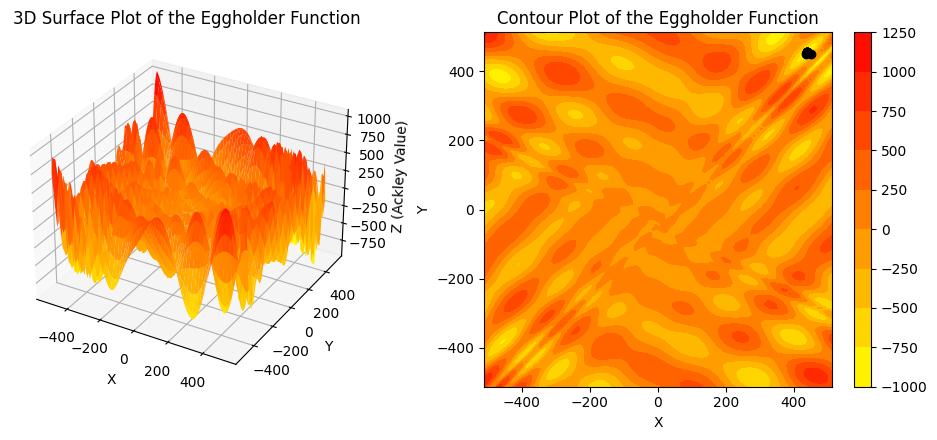

In [6]:
fig = create_optimization_plot(problem_name, problem, results, colormap='autumn_r')

In [7]:
fig.savefig(
    '/Users/ryandevera/data-science/umn_environments/Deeplifting'
    f'/images/{problem_name}_surface_and_contour-autumn.png'
)

In [8]:
problem_name.capitalize()

'Eggholder'

In [9]:
import numpy as np

In [10]:
x = np.array([1, 2, 3])

In [11]:
x[[0, 2]]

array([1, 3])